In [2]:
import csv, nltk, sklearn, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

In [3]:
with open('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/classroom_activity.csv','r') as f:
    my_list = pd.read_csv(f)

In [4]:
len(my_list)

1406

In [5]:
type(my_list)

pandas.core.frame.DataFrame

In [6]:
my_list[-5:]

,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."
1401,During the time that I worked at [Employer] as...
1402,"I am a transfer student, so I have only had 2 ..."
1403,Not much in the classroom helped me with my jo...
1404,I think that the biggest thing that was missin...
1405,I will study accounting classes and Excel hard...


In [7]:
stop_words = set(stopwords.words("english"))

In [8]:
def fix_Text(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[w for w in words if not w in stop_words]
    return(" ".join(meaningful))

In [9]:
my_list[0:2]

,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."
0,"Very well prepared from Drexel, overall awesom..."
1,I believe the Interactive Marketing class that...


In [10]:
fix_Text(my_list[0:2])

'reflecting upon recent cooperative education experience well think classroom activities prepared anything missing felt would better prepared suggestions improve classroom activities prepare career please compose word reflective essay addressing issues including specific examples whenever possible well prepared drexel overall awesom believe interactive marketing class'

In [16]:

clean_text = []
for i in range(0,num_resp):
    clean_text.append(fix_Text(my_list["Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."][i]))

In [17]:
num_resp = len(my_list)

In [18]:
num_resp

1406

In [19]:
type(my_list)

pandas.core.frame.DataFrame

In [15]:
my_list

,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."
0,"Very well prepared from Drexel, overall awesom..."
1,I believe the Interactive Marketing class that...
2,When I reflect on the past 6 months at [Employ...
3,The co-op was unrelated to much of the coursew...
4,The position I held at [Employer] was sales re...
...,...
1401,During the time that I worked at [Employer] as...
1402,"I am a transfer student, so I have only had 2 ..."
1403,Not much in the classroom helped me with my jo...
1404,I think that the biggest thing that was missin...


In [26]:
vectorizer = CountVectorizer(min_df=1)

In [27]:
 dtm = vectorizer.fit_transform(clean_text)

In [28]:
dtm.shape

(1406, 7624)

In [30]:
pd.DataFrame(dtm.toarray(),index=range(0,1406),columns=vectorizer.get_feature_names()).head(10)

,aact,abbreviations,abilities,ability,able,ablt,abnormal,abrasive,abroad,abrupt,...,york,young,younger,youtube,zeal,zenefits,zero,zoho,zone,zones
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
terms=vectorizer.get_feature_names_out()

In [33]:
terms[0:10]

array(['aact', 'abbreviations', 'abilities', 'ability', 'able', 'ablt',
       'abnormal', 'abrasive', 'abroad', 'abrupt'], dtype=object)

In [34]:
tfidf_transformer = TfidfTransformer()
tfidf_dtm = tfidf_transformer.fit_transform(dtm)

In [35]:
lsa = TruncatedSVD(25, algorithm='randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [37]:
pd.DataFrame(lsa.components_, columns=vectorizer.get_feature_names_out()).head(10)

,aact,abbreviations,abilities,ability,able,ablt,abnormal,abrasive,abroad,abrupt,...,york,young,younger,youtube,zeal,zenefits,zero,zoho,zone,zones
0,5.896988e-05,0.000100,0.002802,0.013444,0.081010,0.000028,0.000213,0.000090,0.000427,0.000096,...,0.000467,0.001409,0.000528,0.000104,0.000079,0.000144,0.000941,0.000085,0.000799,0.000110
1,-1.866088e-04,0.000058,-0.001923,-0.013178,-0.033639,0.000026,-0.000174,-0.000257,0.000258,-0.000094,...,-0.001334,0.000242,0.000014,0.000053,-0.000299,0.000243,-0.000978,-0.000386,0.000825,0.000166
2,-6.330613e-04,0.000018,0.001698,0.007671,0.028218,0.000054,-0.000066,0.000842,-0.000088,-0.000544,...,-0.000975,0.002720,-0.000797,-0.000306,-0.000574,0.000059,-0.001370,-0.000011,0.000213,0.000498
3,-1.305358e-07,-0.000270,-0.004135,0.000634,0.006718,0.000022,0.000100,-0.000013,-0.001462,-0.000533,...,0.000561,-0.000764,0.001188,0.000483,0.000161,0.000552,0.001356,-0.000313,-0.001829,0.000156
4,-1.147753e-04,-0.000208,-0.002527,-0.011752,0.026347,-0.000122,0.000519,-0.000211,0.001282,0.000188,...,-0.000340,-0.004046,-0.000299,-0.000727,-0.000628,0.000010,0.001293,-0.000143,0.000177,-0.000635
5,-1.769567e-04,0.000174,0.000118,-0.006860,-0.079371,0.000197,0.001086,-0.000428,0.000593,0.000254,...,0.002680,0.003157,0.000324,0.000709,0.000319,-0.000331,0.002531,0.000576,-0.001213,0.000417
6,7.310226e-04,0.000311,-0.001935,0.008249,0.017701,0.000045,0.000196,0.000027,-0.001385,-0.000179,...,-0.000346,-0.000497,0.000980,0.000667,-0.000176,0.000034,0.001622,-0.000643,-0.001078,0.000174
7,3.671026e-04,-0.000256,-0.003130,-0.012838,-0.055172,-0.000019,0.000336,-0.000352,0.000504,-0.000337,...,-0.001185,-0.000077,0.003237,-0.000474,0.000242,-0.000062,0.002407,-0.000238,-0.000514,0.000658
8,-7.006619e-04,0.000375,0.005613,0.014157,0.057124,-0.000053,-0.001183,-0.000331,-0.000058,0.000169,...,0.001080,0.001997,0.001413,0.000024,0.000536,0.000002,-0.001091,-0.000080,0.000098,-0.000492
9,1.147143e-03,0.000077,-0.002576,0.000480,-0.051713,-0.000114,-0.000509,0.000163,-0.000172,-0.000059,...,0.000372,-0.000266,0.000856,-0.000926,-0.000107,-0.000323,-0.000824,-0.000525,-0.000163,0.000216


In [ ]:
 pd.DataFrame(dtm_lsa, index=range(0,1406)).head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.520448,-0.045954,0.239928,0.074607,-0.196524,-0.058788,0.053600,0.109931,0.213574,0.029340,...,-0.405138,-0.003816,0.029846,-0.164494,-0.117423,0.174067,0.096125,-0.204367,-0.001710,-0.140630
1,0.563593,-0.257663,-0.050146,-0.139986,0.288400,0.156011,-0.087860,0.046197,0.209889,-0.075842,...,-0.056017,0.129754,-0.098387,0.249954,0.140565,0.290659,0.144906,-0.074859,-0.071918,-0.065657
2,0.704803,-0.034194,-0.031947,0.416411,-0.180614,0.171782,-0.082297,-0.059474,0.047152,-0.157756,...,-0.207100,-0.058711,0.121596,-0.208377,0.024017,-0.136541,0.113283,-0.000278,0.056699,0.102186
3,0.768342,0.111142,-0.070893,-0.026446,-0.286736,0.098308,-0.076541,-0.007119,0.159290,0.091144,...,0.170888,-0.024488,-0.017419,0.224291,0.224032,0.103310,0.030975,0.269519,-0.001344,-0.131311
4,0.540431,-0.351903,0.043587,0.431551,-0.087904,-0.026290,0.119464,-0.191512,0.298130,-0.094513,...,-0.063966,-0.139605,0.148043,0.297696,0.230747,-0.012785,-0.061810,-0.049917,-0.108957,0.071977
5,0.726074,0.165719,0.120390,-0.019527,-0.152637,0.112114,-0.085297,-0.092184,0.044252,-0.303005,...,-0.013943,-0.253085,-0.068847,0.110585,-0.031555,-0.089824,-0.039393,0.054944,-0.093557,0.034703
6,0.803225,0.029679,-0.029472,-0.197997,-0.000012,-0.177451,0.093308,-0.191039,0.017329,-0.186002,...,0.013914,-0.079549,-0.094512,-0.112850,-0.148674,-0.039928,-0.173039,-0.146611,0.048765,-0.075465
7,0.646929,-0.029418,-0.160872,-0.295706,-0.003731,0.323528,-0.063187,-0.102179,0.249598,0.203988,...,-0.208099,-0.001566,0.188490,0.060798,-0.145932,-0.118145,0.151382,-0.017331,0.097325,-0.104679
8,0.543490,-0.317319,0.071144,-0.122639,-0.300147,0.115616,-0.167790,-0.120274,0.052297,0.093634,...,-0.216311,-0.119412,0.287520,-0.195464,0.014455,0.249900,-0.278498,0.061795,-0.135956,-0.077322
9,0.764872,-0.074873,-0.001519,0.115790,0.263763,0.265694,-0.016801,0.040807,-0.140850,0.116513,...,0.030132,0.071337,-0.114716,-0.038646,0.034191,-0.302866,-0.177551,0.040583,-0.167501,-0.004431


** Next, we can calculate document similarity and view the first and last 10 vdocuments.

In [41]:
doc_sim=np.asarray(np.asmatrix(dtm_lsa)*np.asmatrix(dtm_lsa).T)
pd.DataFrame(doc_sim, index=range(0,1406), columns=range(0,1406)).head(10)

,0,1,2,3,4,5,6,7,8,9,...,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
0,1.000000,0.410338,0.597524,0.339492,0.346812,0.392319,0.411831,0.370412,0.598399,0.208838,...,0.396177,0.087185,0.272700,0.237279,0.473748,0.643420,0.342234,0.253020,0.527384,0.270645
1,0.410338,1.000000,0.257263,0.482270,0.473659,0.490981,0.383695,0.404939,0.382670,0.463735,...,0.461637,0.149725,0.360722,0.346279,0.497219,0.608693,0.407697,0.470749,0.503325,0.049807
2,0.597524,0.257263,1.000000,0.505893,0.567335,0.586050,0.469600,0.499096,0.488683,0.551254,...,0.511453,0.122372,0.275974,0.402355,0.459909,0.437600,0.534430,0.295480,0.597696,0.358531
3,0.339492,0.482270,0.505893,1.000000,0.508242,0.631952,0.494986,0.556965,0.464814,0.507949,...,0.632818,0.180520,0.300679,0.425521,0.648308,0.577716,0.592292,0.505773,0.476049,0.375036
4,0.346812,0.473659,0.567335,0.508242,1.000000,0.488052,0.367282,0.264154,0.430036,0.420607,...,0.311111,0.183845,0.088034,0.262808,0.314384,0.440633,0.202716,0.342693,0.524328,0.260051
5,0.392319,0.490981,0.586050,0.631952,0.488052,1.000000,0.606104,0.378636,0.427184,0.545103,...,0.420863,0.300997,0.343625,0.362056,0.499198,0.423824,0.591113,0.769238,0.449245,0.478200
6,0.411831,0.383695,0.469600,0.494986,0.367282,0.606104,1.000000,0.521870,0.453921,0.585116,...,0.579489,0.483974,0.423795,0.544554,0.457505,0.603249,0.526440,0.498214,0.370312,0.546492
7,0.370412,0.404939,0.499096,0.556965,0.264154,0.378636,0.521870,1.000000,0.439712,0.506435,...,0.646165,0.028950,0.205062,0.443386,0.295046,0.399535,0.463352,0.295120,0.300295,0.243678
8,0.598399,0.382670,0.488683,0.464814,0.430036,0.427184,0.453921,0.439712,1.000000,0.323173,...,0.417052,0.368985,0.139929,0.519275,0.312603,0.397748,0.343681,0.414253,0.529316,0.060775
9,0.208838,0.463735,0.551254,0.507949,0.420607,0.545103,0.585116,0.506435,0.323173,1.000000,...,0.580697,0.092290,0.237992,0.504843,0.495177,0.287153,0.758311,0.392190,0.518041,0.319501


Now, we can visualize our latent factors. We will create a scatterplot of the first and second latent factors in two-dimensional space using plt.scatter, after defining the x variable, xs, as the first factor and the y variable, ys, as the second factor. We label our x-axis using xlabel, our y-axis using ylabel, and our plot using title.

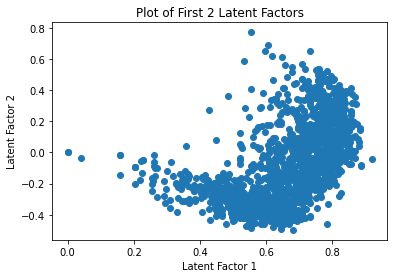

In [49]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
plt.scatter(xs,ys)
xlabel('Latent Factor 1')
ylabel('Latent Factor 2')
title('Plot of First 2 Latent Factors')
show()


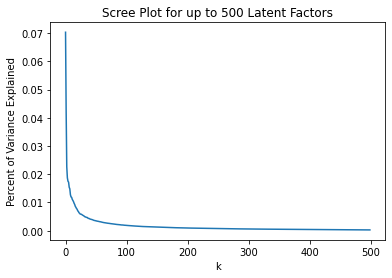

In [50]:
svd = TruncatedSVD(500, algorithm='randomized')
svd.fit(dtm)

VarianceExplained=svd.explained_variance_ratio_
plt.plot(VarianceExplained)

xlabel('k')

ylabel('Percent of Variance Explained')

title('Scree Plot for up to 500 Latent Factors')

show()

In [51]:
lsa_tfidf = TruncatedSVD(25, algorithm='randomized')
tfidf_lsa = lsa_tfidf.fit_transform(tfidf_dtm)
tfidf_lsa = Normalizer(copy=False).fit_transform(tfidf_lsa)

In [53]:
 pd.DataFrame(lsa_tfidf.components_, columns=vectorizer.get_feature_names_out()).head(10)

,aact,abbreviations,abilities,ability,able,ablt,abnormal,abrasive,abroad,abrupt,...,york,young,younger,youtube,zeal,zenefits,zero,zoho,zone,zones
0,0.000182,0.000449,0.007361,0.023764,0.084498,0.000421,0.000790,0.000345,0.001388,0.000251,...,0.001013,0.002777,0.001449,0.000253,0.000221,0.000380,0.002513,0.000259,0.002136,0.000393
1,-0.000523,0.000185,0.003231,-0.021807,-0.009330,0.000362,-0.000285,-0.000511,0.002298,-0.000389,...,-0.002411,-0.000679,0.000393,-0.000165,-0.000744,0.000773,-0.001837,-0.000941,0.002964,0.000226
2,0.001284,0.000491,-0.008029,-0.003313,-0.024040,0.001026,0.000718,-0.001346,-0.002462,0.000221,...,0.001200,-0.003466,0.003105,0.001382,0.000498,0.000018,0.003474,-0.000069,-0.004926,-0.000529
3,-0.000500,-0.000361,0.008844,-0.013301,0.001406,-0.000841,-0.000287,-0.001011,0.003879,0.000749,...,0.000453,-0.000397,-0.000538,-0.000625,0.000510,-0.000508,-0.000162,0.001062,0.000777,-0.001476
4,0.001468,-0.000880,-0.010925,-0.019432,-0.006992,-0.001842,0.000132,0.000014,0.000672,-0.000315,...,-0.000425,-0.005897,0.000450,-0.002286,-0.001430,-0.000686,0.001529,-0.000523,0.000108,-0.000389
5,-0.001367,-0.001414,-0.005377,-0.021053,-0.090022,0.001197,0.001948,-0.000602,-0.000667,0.000608,...,0.002022,0.003281,-0.000200,0.000789,-0.000012,0.000279,0.001509,-0.000096,0.003801,-0.000550
6,-0.000866,-0.000505,0.004931,-0.018008,-0.019841,0.000426,0.001757,-0.000788,0.003349,0.000409,...,0.001754,-0.003719,-0.005761,0.000283,-0.000339,-0.000097,0.000514,0.000226,-0.002216,-0.001676
7,-0.001015,-0.000798,0.003053,0.014983,0.016415,0.001459,-0.003580,0.000643,0.000177,0.000322,...,0.000176,-0.003927,-0.001161,-0.000671,0.000468,-0.000137,-0.006645,0.000109,-0.001004,-0.001206
8,0.000494,0.002196,0.010726,0.012854,0.060120,-0.000918,-0.000360,-0.001272,0.001794,0.001544,...,0.001557,0.003270,-0.000975,0.000272,-0.000461,-0.000776,-0.006092,-0.000291,0.004344,0.000048
9,-0.000699,-0.000287,-0.006198,0.005670,0.037110,-0.000520,-0.001429,0.000723,-0.003771,0.000456,...,-0.004732,-0.008666,-0.006717,-0.000329,-0.000915,0.000711,-0.000194,-0.000410,0.000060,-0.001859


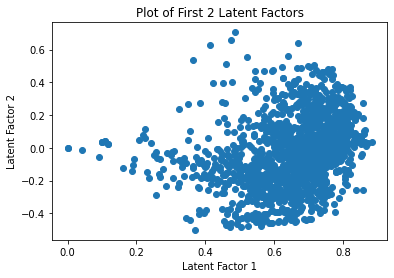

In [54]:
x1s = [q[0] for q in tfidf_lsa]
y1s = [q[1] for q in tfidf_lsa]
plt.scatter(x1s,y1s)

xlabel('Latent Factor 1')

ylabel('Latent Factor 2')

title('Plot of First 2 Latent Factors')

show()

In [55]:
svd_tfidf = TruncatedSVD(25, algorithm='randomized')
svd_tfidf.fit(tfidf_dtm)

svd_tfidf.singular_values_

array([10.94612624,  3.83717582,  3.37675434,  3.19373564,  2.92387975,
        2.89829765,  2.79571486,  2.76314831,  2.69062674,  2.63067729,
        2.56248257,  2.52109466,  2.46748888,  2.4497882 ,  2.34153076,
        2.31997102,  2.26152793,  2.25762975,  2.18997953,  2.14127354,
        2.11164373,  2.08339283,  2.06325411,  2.01365856,  1.98857518])

Text(0.5, 1, 'Scree Plot for up to 25 Latent Factors')

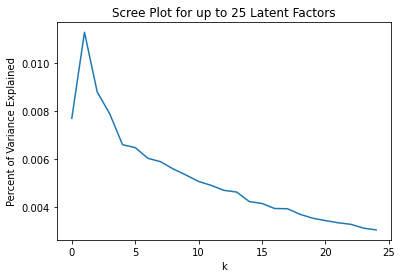

In [57]:
VarianceExplained_tfidf=svd_tfidf.explained_variance_ratio_
plt.plot(VarianceExplained_tfidf)

xlabel('k')

ylabel('Percent of Variance Explained')

title('Scree Plot for up to 25 Latent Factors')
Text(0.5,1,'Scree Plot for up to 25 Latent Factors')


In [58]:
VarianceExplained_tfidf

array([0.00769636, 0.01128435, 0.00880494, 0.007877  , 0.00660181,
       0.00648036, 0.00603583, 0.00589343, 0.00559047, 0.00533963,
       0.00507084, 0.00490665, 0.00470129, 0.00462989, 0.00423342,
       0.004154  , 0.00394394, 0.00393609, 0.00370334, 0.00354013,
       0.00344225, 0.00335026, 0.00328728, 0.00312787, 0.00305346])

In [59]:
VarianceExplained_tfidf[3]-VarianceExplained_tfidf[4]

0.0012751851281605324

In [61]:
sing_vecs = lsa_tfidf.components_[0]
index = np.argsort(sing_vecs).tolist()
index.reverse()
terms = [vectorizer.get_feature_names_out()[weightIndex] for weightIndex in index[0:10]]
weights = [sing_vecs[weightIndex] for weightIndex in index[0:10]]
terms.reverse()
weights.reverse()

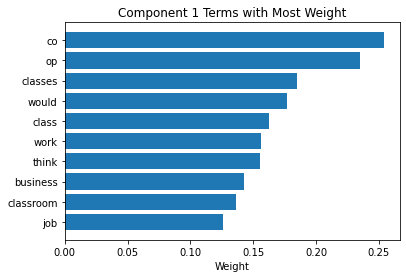

Text(0.5, 1, 'Terms with Most Weight in Dimension 1')

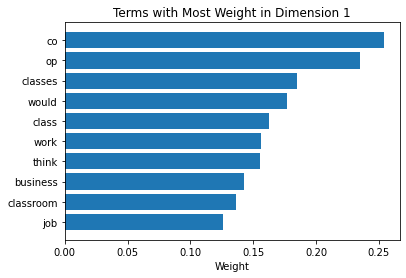

In [62]:
plt.barh(terms, weights, align="center")

xlabel('Weight')

title('Component 1 Terms with Most Weight')

show()
plt.barh(terms, weights, align="center")

xlabel('Weight')

title('Terms with Most Weight in Dimension 1')
Text(0.5,1,'Terms with Most Weight in Dimension 1')

In [63]:
result = []


In [65]:
for i in range(0,4):
    sing_vecs = lsa_tfidf.components_[i]
    index = np.argsort(sing_vecs).tolist()
    index.reverse()
    terms = [vectorizer.get_feature_names_out()[weightIndex] for weightIndex in index[0:10]]
    weights = [sing_vecs[weightIndex] for weightIndex in index[0:10]]
    terms.reverse()
    weights.reverse()
    temp = pd.DataFrame(columns=('terms','weights'))
    temp['terms'] = terms
    temp['weights'] = weights
    result.append(temp)

In [66]:
result[0]

,terms,weights
0,job,0.125755
1,classroom,0.136349
2,business,0.142726
3,think,0.155171
4,work,0.156459
5,class,0.162664
6,would,0.177009
7,classes,0.185035
8,op,0.234559
9,co,0.253635


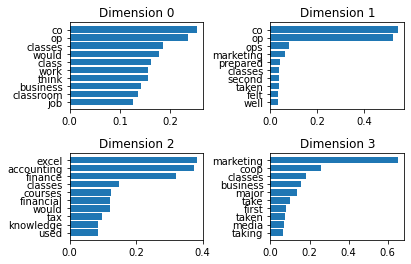

In [67]:
fig = plt.figure()
fig.subplots_adjust(hspace=.5, wspace=.5)
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.barh(result[i]['terms'],result[i]['weights'], align="center")
    ax.set_title('Dimension %d' % (i))

Text(0.5,1,'Dimension 0')

Text(0.5,1,'Dimension 1')

Text(0.5,1,'Dimension 2')

Text(0.5,1,'Dimension 3')
plt.show()

In [68]:
a= "hi"